1. Produce data 20_2_5(T = 20, Variable Dim = 2,Patient = 5)

In [53]:
import sys
sys.path.append("/home/zhouqua1") 
sys.path.append("/home/zhouqua1/NCPOP") 
from inputlds import*
from functions import*
from ncpol2sdpa import*
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.preprocessing import scale
from itertools import combinations

step=0.1
T=20
level=1
patient_n1= 3
patient_n2= 2
# LDS1
# Set parameters
start1=0.1
stop1=0.3


# Collect the nrmse value for each experiment
# The function SimCom() might fail to find any feasible solutions
pro_rang1 = np.arange(start1,stop1,step)
obs_rang1 = np.arange(start1,stop1,step)
proL1=len(pro_rang1)
obsL1=len(obs_rang1)

g1 = np.matrix([[0.9,0.2],[0.1,0.1]])
f_dash1 = np.matrix([[1.0,1.0]])

D1 = np.zeros((T,obsL1))
Dataa1=pd.DataFrame(range(T),columns=['Time'])
#np.asarray(ds1.outputs).reshape(-1).tolist()
for n in range(patient_n1):
    for i in range(proL1):
        for j in range(obsL1):
            Y1=data_generation(g1,f_dash1,pro_rang1[i],obs_rang1[j],T)
            D1[:,j] = Y1
        Data1=pd.DataFrame(D1,columns=['Patient_'+str(n+1)+'_HBP', 'Patient_'+str(n+1)+'_BloodPressure'])
    Dataa1=pd.concat([Dataa1, Data1], axis=1)


#LDS2
# Set parameters
start2=0.1
stop2=0.3

# Collect the nrmse value for each experiment
# The function SimCom() might fail to find any feasible solutions
pro_rang2 = np.arange(start2,stop2,step)
obs_rang2 = np.arange(start2,stop2,step)
proL2=len(pro_rang2)
obsL2=len(obs_rang2)

g2 = np.matrix([[0.7,0.3],[0.3,0.3]])
f_dash2 = np.matrix([[2.0,2.0]])

D2 = np.zeros((T,obsL2))
Dataa2=pd.DataFrame(range(T),columns=['Time'])
#np.asarray(ds1.outputs).reshape(-1).tolist()
for n in range(patient_n2):
    for i in range(proL2):
        for j in range(obsL2):
            Y2=data_generation(g2,f_dash2,pro_rang2[i],obs_rang2[j],T)
            D2[:,j] = Y2
        Data2=pd.DataFrame(D2,columns=['Patient_'+str(n+patient_n1+1)+'_HBP', 'Patient_'+str(n+patient_n1+1)+'_BloodPressure'])
    Dataa2=pd.concat([Dataa2, Data2], axis=1)
Data=pd.merge(Dataa1, Dataa2, on='Time')
HBP_Data = Data.loc[:,Data.columns.str.contains('HBP')]
BP_Data = Data.loc[:,Data.columns.str.contains('BloodPressure')]
print(HBP_Data)
print(BP_Data)

    Patient_1_HBP  Patient_2_HBP  Patient_3_HBP  Patient_4_HBP  Patient_5_HBP
0        1.450166       1.664789       1.205282       3.995157       2.942052
1        0.697455       1.063118       0.634893       3.347169       2.791886
2        1.289990       1.666722       0.865311       3.568645       3.598994
3        0.788497       1.197985       0.551656       3.656778       2.488520
4        0.828827       1.026080       1.271428       2.716675       1.980803
5        0.881948       1.127842       0.435828       2.759121       1.536511
6        0.570574       1.657288       0.220440       2.383538       2.667581
7        1.113074       0.898103       0.127992       1.211612       2.364614
8        1.250816       0.838295       0.080839       0.700924       0.444186
9        1.104706       0.921440       1.219014       0.726390       1.454654
10       0.817537       0.695875       0.359212       1.399441       1.297876
11       0.839409       0.961155       0.400800       1.363049  

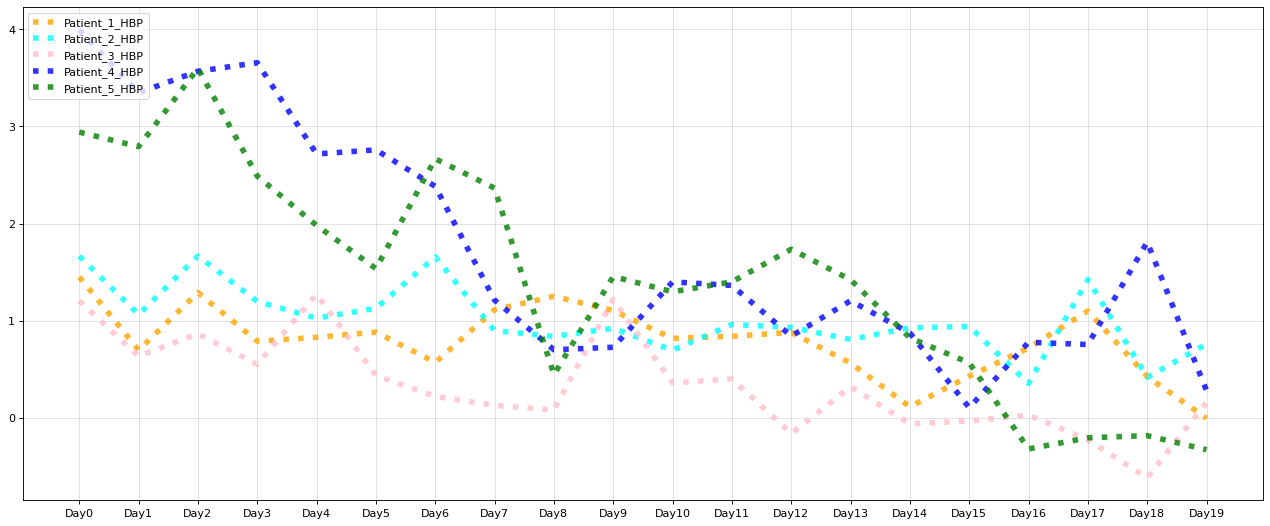

In [65]:
from matplotlib import pyplot as plt

y_1 = list(HBP_Data['Patient_1_HBP'])
y_2 = np.asarray(HBP_Data['Patient_2_HBP'])
y_3 = list(HBP_Data['Patient_3_HBP'])
y_4 = np.asarray(HBP_Data['Patient_4_HBP'])
y_5 = list(HBP_Data['Patient_5_HBP'])
x = list(Data['Time'])

plt.figure(figsize=(20,8),dpi=80)

plt.plot(x,y_1,label="Patient_1_HBP",
         color="orange",
         linestyle=':',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_2,label="Patient_2_HBP",
         color="cyan",
         linestyle=':',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_3,label="Patient_3_HBP",
         color="pink",
         linestyle=':',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_4,label="Patient_4_HBP",
         color="blue",
         linestyle=':',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_5,label="Patient_5_HBP",
         color="green",
         linestyle=':',
         linewidth=5,
         alpha=0.8)

_xtick_labels = ["Day{}".format(i) for i in x]
plt.xticks(x,_xtick_labels )

plt.grid(alpha=0.4)

plt.legend(loc="upper left")

plt.show()

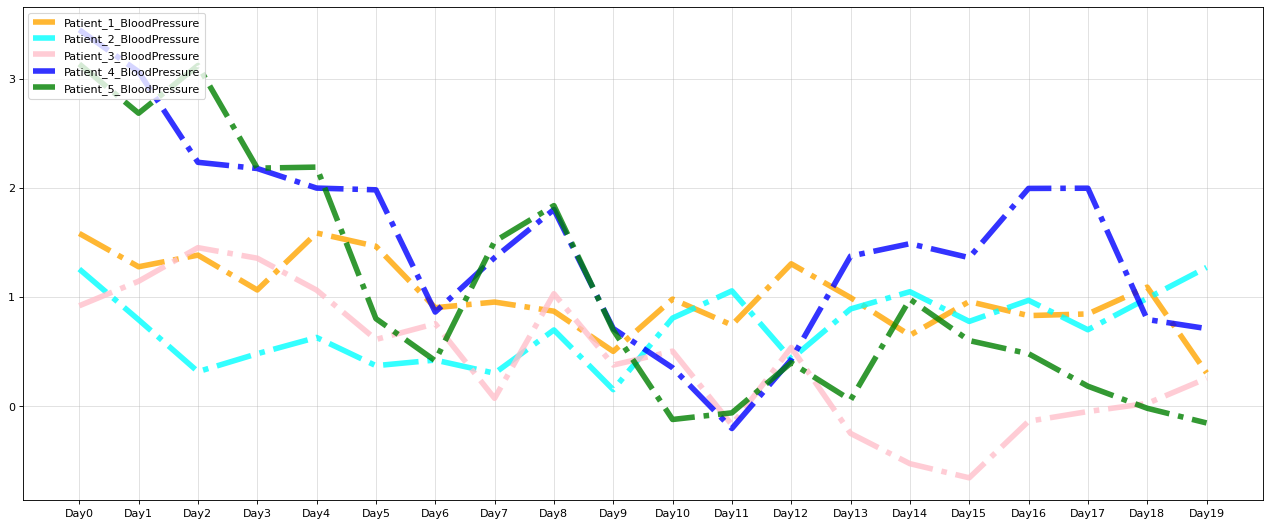

In [66]:
from matplotlib import pyplot as plt

y_1 = list(BP_Data['Patient_1_BloodPressure'])
y_2 = list(BP_Data['Patient_2_BloodPressure'])
y_3 = list(BP_Data['Patient_3_BloodPressure'])
y_4 = list(BP_Data['Patient_4_BloodPressure'])
y_5 = list(BP_Data['Patient_5_BloodPressure'])
x = list(Data['Time'])

plt.figure(figsize=(20,8),dpi=80)

plt.plot(x,y_1,label="Patient_1_BloodPressure",
         color="orange",
         linestyle='-.',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_2,label="Patient_2_BloodPressure",
         color="cyan",
         linestyle='-.',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_3,label="Patient_3_BloodPressure",
         color="pink",
         linestyle='-.',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_4,label="Patient_4_BloodPressure",
         color="blue",
         linestyle='-.',
         linewidth=5,
         alpha=0.8)
plt.plot(x,y_5,label="Patient_5_BloodPressure",
         color="green",
         linestyle='-.',
         linewidth=5,
         alpha=0.8)

_xtick_labels = ["Day{}".format(i) for i in x]
plt.xticks(x,_xtick_labels )

plt.grid(alpha=0.4)

plt.legend(loc="upper left")

plt.show()

2. Initialization groups [1,1,0,0,0]

In [2]:
Time = [0] #time==False
level = 1
Initial_group = [1,1,0,0,0] 

Initial_group1 = Time+Initial_group 
Initial_group2 = list(abs(np.asarray(Initial_group) -1))
Initial_group2 =Time+Initial_group2
y_LDS1 = Data.iloc[:,np.flatnonzero(Initial_group1)]
y_LDS2 = Data.iloc[:,np.flatnonzero(Initial_group2)]
print(y_LDS1.iloc[0,:])
print(y_LDS1)

#print(y_LDS2)

Patient1    2.155648
Patient2    1.339305
Patient3    1.207165
Name: 0, dtype: float64
    Patient1  Patient2  Patient3
0   2.155648  1.339305  1.207165
1   0.553764 -0.058012  0.709212
2   0.620193  1.466596  1.588606
3   1.655176  0.853739  1.027909
4   1.847382  1.183653  1.736754
5   1.730044  1.286674  1.479063
6   2.409187  1.007596  2.112844
7   2.077507  1.860988  1.371982
8   0.184842  0.501574  0.348043
9   0.897596  1.456713  0.850646
10  1.011117  1.254843  2.462323
11  1.129097  1.330333  0.574438
12 -0.478544  0.841266 -0.471641
13 -1.847578  0.833590  0.037853
14 -1.327191  2.083939  0.806890
15 -2.003300  2.802741  1.829480
16 -0.869693  1.582734  0.295853
17 -1.347559  1.122842  0.425049
18 -0.864082  1.227363 -0.993689
19  0.342488 -0.625832  0.512438


3. Predict f_t{t=0,1,...19} for two LDSs by using NCPOP

In [64]:
class NCPOLR(object):
    """Estimator based on NCPOP Regressor

    References
    ----------
    Quan Zhou https://github.com/Quan-Zhou/Proper-Learning-of-LDS/blob/master/ncpop/functions.py
    
    Examples
    --------
    """
    
    def __init__(self, **kwargs):
        super(NCPOLR, self).__init__()
        
    def estimate(self, Y, level):
        """Fit Estimator based on NCPOP Regressor model and predict y or produce residuals.
        The module converts a noncommutative optimization problem provided in SymPy
        format to an SDPA semidefinite programming problem.

        Parameters
        ----------
        Y: array
            Variable seen as effect

        Returns
        -------
        y_predict: array
            regression predict values of y or residuals
        """
        
        T = len(Y)

    
        # Decision Variables
        G = generate_operators("G", n_vars=1, hermitian=True, commutative=False)[0]
        Fdash = generate_operators("Fdash", n_vars=1, hermitian=True, commutative=False)[0]
        m = generate_operators("m", n_vars=T+1, hermitian=True, commutative=False)
        q = generate_operators("q", n_vars=T, hermitian=True, commutative=False)
        p = generate_operators("p", n_vars=T, hermitian=True, commutative=False)
        f = generate_operators("f", n_vars=T, hermitian=True, commutative=False)

        # Objective
        obj = sum((Y[i]-f[i])**2 for i in range(T)) + 0.0005*sum(p[i]**2 for i in range(T)) + 0.001*sum(q[i]**2 for i in range(T))

        #c1*sum(p[i]**2 for i in range(T)) + c2*sum(q[i]**2 for i in range(T))
    
        # Constraints
        ine1 = [f[i] - Fdash*m[i+1] - p[i] for i in range(T)]
        ine2 = [-f[i] + Fdash*m[i+1] + p[i] for i in range(T)]
        ine3 = [m[i+1] - G*m[i] - q[i] for i in range(T)]
        ine4 = [-m[i+1] + G*m[i] + q[i] for i in range(T)]
        #ine5 = [(Y[i]-f[i])**2 for i in range(T)]
        ines = ine1+ine2+ine3+ine4 #+ine5

        # Solve the NCPO
        sdp = SdpRelaxation(variables = flatten([G,Fdash,f,p,m,q]),verbose = 1)
        sdp.get_relaxation(level, objective=obj, inequalities=ines)
        sdp.solve(solver='mosek')
        '''
        with sdp.SolverFactory("mosek") as solver:
            # options - MOSEK parameters dictionary, using strings as keys (optional)
            # tee - write log output if True (optional)
            # soltype - accepts three values : bas, itr and itg for basic,
            # interior point and integer solution, respectively. (optional)
            solver.solve(model, options = {'dparam.optimizer_max_time':  100.0, 
                                           'iparam.intpnt_solve_form':   int(mosek.solveform.dual)},
                                tee = True, soltype='itr')

            # Save data to file (after solve())
            solver._solver_model.writedata("dump.task.gz")
            '''
        #sdp.solve(solver='sdpa', solverparameters={"executable":"sdpa_gmp","executable": "C:/Users/zhouq/Documents/sdpa7-windows/sdpa.exe"})
        print(sdp.primal, sdp.dual, sdp.status)

        if(sdp.status != 'infeasible'):
            print('ok.')
            y_pred = []
            p_pred = []
            m_pred = []
            q_pred = []
            G_pred = []
            Fdash_pred = []
            for i in range(T):
                y_pred.append(sdp[f[i]])
                p_pred.append(sdp[p[i]])
                m_pred.append(sdp[m[i]])
                q_pred.append(sdp[q[i]])
                #print(G,Fdash)
                #G_pred.append(sdp[G])
                #Fdash_pred.append(sdp[Fdash])
            print(y_pred,p_pred,m_pred,q_pred)
            return y_pred,p_pred,m_pred,q_pred
        else:
            print('Cannot find feasible solution.')
            return


y_pred1,p_pred1,m_pred1,q_pred1 = NCPOLR().estimate(list(y_LDS1.iloc[0,:]),level)
#y_LDS2_predict = NCPOLR().estimate(list(y_LDS2),level)
y_pred1

The problem has 15 noncommuting Hermitian variables
Calculating block structure...
Estimated number of SDP variables: 135
Generating moment matrix...
Reduced number of SDP variables: 135135 (done: 100.74%, ETA 00:00:-0.0)
Processing 12/12 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 135             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1 (scalarized: 406)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00  

[2.1556478785821214, 1.3393048429179801, 1.207164604922267]

## Normal Distribution shapiro Test 

In [ ]:
N = len(x)
if N < 3:
    raise ValueError("Data must be at least length 3.")

a = zeros(N, 'f')
init = 0

y = sort(x)
a, w, pw, ifault = statlib.swilk(y, a[:N//2], init)
if ifault not in [0, 2]:
    warnings.warn("Input data for shapiro has range zero. The results "
                  "may not be accurate.")
if N > 5000:
    warnings.warn("p-value may not be accurate for N > 5000.")

return ShapiroResult(w, pw)

In [85]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
shapiro(lognorm_dataset)


ShapiroResult(statistic=0.8573322892189026, pvalue=3.880496661488187e-29)

## Sympy（solve n*n matrix）

In [69]:
Fdash = generate_operators("Fdash", n_vars=60, hermitian=True, commutative=False)
import sympy

a = sympy.Matrix([[2,-2,-4],[-1,3,4],[1,-2,-3]])
b = sympy.Matrix([0,0,0])
x = np.matrix(sympy.symarray('x', 3)).T
print(x)
print(sympy.solve(a * (x) - b))

y = sympy.Matrix([y_pred1[0]])
p = sympy.Matrix([p_pred1[0]])
m = sympy.Matrix( sympify(m_pred1))
Fdash = sympy.Matrix([],[]
sympy.symarray('x', 60)

Fdash*(m.T)
print(sympy.solve(y - Fdash*matrix(m) - p))


[[x_0]
 [x_1]
 [x_2]]
{x_0: x_2, x_1: -x_2}


TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'MutableDenseMatrix'

## Test AR(2) TS

In [70]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
 
# 生成N(0,1)随机正态分布（白噪声）
noise = np.random.randn(200)
wnoise = (noise-np.mean(noise))/np.std(noise)
 
# 生成AR(2)线性序列 X(t)=0.5X(t-1)+0.1X(t-2)
X = [20,10]  # 初值
for i in range(200):
    x2 = 0.5*X[i+1]+0.1*X[i]+wnoise[i]
    X.append(x2)
 
# 2阶AR模型拟合（OLS）
AR2_model = AutoReg(X, 2).fit()  
# 模型预测第3到第202个时间点的数据
predict = AR2_model.predict(2,201)  
# 计算残差
residual = X[2:]-predict

Text(-3, 0.35, 'μ=-0.000\n σ=0.999')

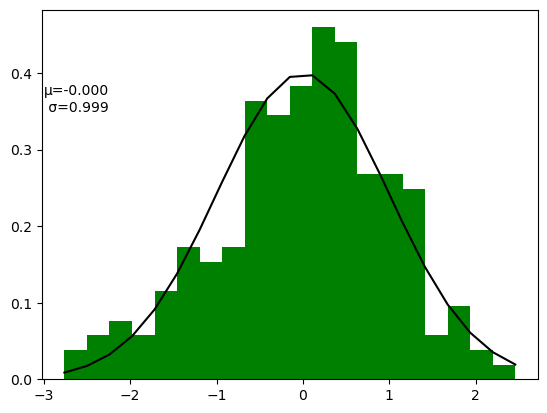

In [71]:
# 查看残差的分布
import scipy.stats as st   # 统计分析库
plt.figure()
n, bins, patches = plt.hist(residual,20, density=True, histtype='bar', facecolor='green')
power_mean = np.mean(residual)  # 均值约为0
power_std = np.std(residual)    # 方差约为1
y = st.norm.pdf(bins, power_mean, power_std)  # 拟合PDF
plt.plot(bins, y, color='k')
plt.text(-3,0.35,'μ='+'%.3f' %power_mean+'\n σ='+'%.3f' %power_std)

## Test AR(1) TS

In [ ]:
# AR(1)_OLS
AR1_model = AutoReg(m_pred1, 1).fit()  

predict = AR1_model.predict()[1:]  
# Residual
residual = m_pred1[1:]-predict
power_mean = np.mean(residual)  # = 0
power_std = np.std(residual)    # = 1

## Neos_pyomo glpk(Linear Constraints)

## Neos_pyomo cplex_IBM

In [51]:
import pyomo.environ as pyo 

# 创建一个模型实例
model = pyo.ConcreteModel()
# 向模型实例添加变量，x是变量组成的向量，维度是2，并且，每个变量都是非负实数
model.x = pyo.Var([1, 2], domain=pyo.NonNegativeReals)
# 向模型实例添加目标函数，目标函数是由向量中的各个变量与其系数组成
model.OBJ = pyo.Objective(expr=2 * model.x[1] + 3 * model.x[2])
# 添加约束，由于在添加变量的时候已经指定了非负实数，因此，这里的约束条件只剩下一个了
model.Constraint1 = pyo.Constraint(expr=3 * model.x[1] + 4 * model.x[2] >= 1)

#opt = pyo.SolverFactory('glpk')
opt = pyo.SolverFactory('cplex', executable='/mnt/appl_common/software/CPLEX/22.1.0/cplex/bin/x86-64_linux/cplex')
#/Applications/CPLEX_Studio_Community2211/cplex/bin/arm64_osx

opt.solve(model)

print('x1: ', pyo.value(model.x[1]))
print('x2: ', pyo.value(model.x[2]))


x1:  0.3333333333333333
x2:  0.0


In [8]:
from pyomo.environ import *

SCUC = ConcreteModel('example')

# SETS
SCUC.ups = Set(initialize=['G1', 'G2', 'G3'])
SCUC.zones = Set(initialize=['Z1', 'Z2'])

# PARAMS
SCUC.pmi = Param(SCUC.ups, initialize=2)  # junk initialization...
SCUC.zonal_up = Param(SCUC.ups, SCUC.zones, initialize=3)

# VARIABLES
SCUC.u = Var(SCUC.zones)
SCUC.d = Var(SCUC.ups)

# CONSTRAINTS
# "for each" (up, zone) pair...
def zonal_gen_rule(SCUC, zone, up):
    return SCUC.u[zone] == SCUC.pmi[up] * SCUC.zonal_up[up, zone] \
                           + SCUC.zonal_up[up, zone] * SCUC.d[up]
SCUC.zonal_gen_1 = Constraint(SCUC.zones, SCUC.ups, rule=zonal_gen_rule)

# "for each zone, sum the ups"
def zonal_gen_rule_2(SCUC, zone):
    return SCUC.u[zone] == sum(SCUC.pmi[up] * SCUC.zonal_up[up, zone] \
                           + SCUC.zonal_up[up, zone] * SCUC.d[up] for up in SCUC.ups)
SCUC.zonal_gen_2 = Constraint(SCUC.zones, rule=zonal_gen_rule_2)

SCUC.pprint()

4 Set Declarations
    ups : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'G1', 'G2', 'G3'}
    zonal_gen_1_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain    : Size : Members
        None :     2 : zones*ups :    6 : {('Z1', 'G1'), ('Z1', 'G2'), ('Z1', 'G3'), ('Z2', 'G1'), ('Z2', 'G2'), ('Z2', 'G3')}
    zonal_up_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain    : Size : Members
        None :     2 : ups*zones :    6 : {('G1', 'Z1'), ('G1', 'Z2'), ('G2', 'Z1'), ('G2', 'Z2'), ('G3', 'Z1'), ('G3', 'Z2')}
    zones : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'Z1', 'Z2'}

2 Param Declarations
    pmi : Size=3, Index=ups, Domain=Any, Default=None, Mutable=False
        Key : Value
         G1 :     2
         G2 :     2
         G3 :     2
    zonal_up : Size=6, Index=zonal_up_index

In [9]:
from __future__ import division
import pyomo.environ as pyo

model = pyo.AbstractModel()

model.m = pyo.Param(within=pyo.NonNegativeIntegers)
model.n = pyo.Param(within=pyo.NonNegativeIntegers)

model.I = pyo.RangeSet(1, model.m)
model.J = pyo.RangeSet(1, model.n)

model.a = pyo.Param(model.I, model.J)
model.b = pyo.Param(model.I)
model.c = pyo.Param(model.J)

# the next line declares a variable indexed by the set J
model.x = pyo.Var(model.J, domain=pyo.NonNegativeReals)

def obj_expression(m):
    return pyo.summation(m.c, m.x)

model.OBJ = pyo.Objective(rule=obj_expression)

def ax_constraint_rule(m, i):
    # return the expression for the constraint for i
    return sum(m.a[i,j] * m.x[j] for j in m.J) >= m.b[i]

# the next line creates one constraint for each member of the set model.I
model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)


In [7]:
print(model.n)

n


In [62]:
import pyomo.environ as pyo 
Y = y_LDS1
T = len(Y)

# Decision Variables
G = generate_operators("G", n_vars=1, hermitian=True, commutative=False)[0]
Fdash = generate_operators("Fdash", n_vars=1, hermitian=True, commutative=False)[0]
m = generate_operators("m", n_vars=T+1, hermitian=True, commutative=False)
q = generate_operators("q", n_vars=T, hermitian=True, commutative=False)
p = generate_operators("p", n_vars=T, hermitian=True, commutative=False)
f = generate_operators("f", n_vars=T, hermitian=True, commutative=False)


# 创建一个模型实例
model = pyo.ConcreteModel()
# 向模型实例添加变量
model.G = pyo.Var([0], domain=pyo.NonNegativeReals)
model.Fdash = pyo.Var([0], domain=pyo.NonNegativeReals)
model.f = pyo.Var(range(T), domain=pyo.NonNegativeReals)
model.p = pyo.Var(range(T), domain=pyo.NonNegativeReals)
model.m = pyo.Var(range(T), domain=pyo.NonNegativeReals)
model.q = pyo.Var(range(T), domain=pyo.NonNegativeReals)


# 向模型实例添加目标函数，目标函数是由向量中的各个变量与其系数组成
model.OBJ = pyo.Objective(expr= sum((Y[i]-model.f[i])**2 for i in range(T)) + 0.0005*sum(model.p[i]**2 for i in range(T)) + 0.001*sum(model.q[i]**2 for i in range(T)))
                        

# Add constraints
model.Constraint1 = pyo.Constraint(expr= model.f[1] == model.Fdash[0]*model.m[2] + model.p[1])
model.Constraint2 = pyo.Constraint(expr=model.m[1] == model.G[0]*model.m[0] + model.q[0])

'''
#model.Constraint1 = pyo.Constraint(expr= [model.f[i] == model.Fdash[0]*model.m[i] + model.p[i]for i in range(T)])
def constraint_rule(model, i):
    # return the expression for the constraint for i
    return model.f[i] == model.Fdash[0]*model.m[i] + model.p[i]

# the next line creates one constraint for each member of the set model.I
#model.Constraint1 = pyo.Constraint(model.m, rule=constraint_rule)

#model.f == model.Fdash*model.m + model.p)
#for i in range(T-1):
'''
#opt = pyo.SolverFactory('glpk')
opt = pyo.SolverFactory('cplex', executable='/mnt/appl_common/software/CPLEX/22.1.0/cplex/bin/x86-64_linux/cplex')

opt.solve(model)

print('G: ', pyo.value(model.G))
print('Fdash: ', pyo.value(model.Fdash))
print('f: ', pyo.value(model.f))
print('p: ', pyo.value(model.p))
print('m: ', pyo.value(model.m))
print('q: ', pyo.value(model.q))


'''
# Decision Variables
G = generate_operators("G", n_vars=1, hermitian=True, commutative=False)[0]
Fdash = generate_operators("Fdash", n_vars=1, hermitian=True, commutative=False)[0]
m = generate_operators("m", n_vars=T+1, hermitian=True, commutative=False)
q = generate_operators("q", n_vars=T, hermitian=True, commutative=False)
p = generate_operators("p", n_vars=T, hermitian=True, commutative=False)
f = generate_operators("f", n_vars=T, hermitian=True, commutative=False)

# Objective
obj = sum((Y[i]-f[i])**2 for i in range(T)) + 0.0005*sum(p[i]**2 for i in range(T)) + 0.001*sum(q[i]**2 for i in range(T))

#c1*sum(p[i]**2 for i in range(T)) + c2*sum(q[i]**2 for i in range(T))

# Constraints
ine1 = [f[i] - Fdash*m[i+1] - p[i] for i in range(T)]
ine2 = [-f[i] + Fdash*m[i+1] + p[i] for i in range(T)]
ine3 = [m[i+1] - G*m[i] - q[i] for i in range(T)]
ine4 = [-m[i+1] + G*m[i] + q[i] for i in range(T)]
#ine5 = [(Y[i]-f[i])**2 for i in range(T)]
ines = ine1+ine2+ine3+ine4 #+ine5
'''

ValueError: Cannot load a SolverResults object with bad status: error

In [18]:
[range(T)]

[range(0, 20)]

## Neos_pyomo ipopt

In [5]:
import numpy as np
from pyomo.environ import *
from pyomo.dae import *

model = ConcreteModel()
model.x = Var(RangeSet(1, 4), bounds=(1, 5))
model.cons1 = Constraint(rule=lambda model: 40==model.x[1]**2+model.x[2]**2+model.x[3]**2+model.x[4]**2)
model.cons2 = Constraint(rule=lambda model: 25<=model.x[1]*model.x[2]*model.x[3]*model.x[4])
model.obj = Objective(expr = model.x[1]*model.x[4]*(model.x[1] + model.x[2] + model.x[3]) + model.x[3], sense=minimize) 
SolverFactory('ipopt').solve(model)
solutions = [model.x[i]() for i in range(1, 5)]
print("solutins is :"+str(solutions))


    ipopt


ApplicationError: No executable found for solver 'ipopt'

In [ ]:
## obj=sum((Y[i]-f[i])**2 for i in range(T)) + 0.0005*sum(p[i]**2 for i in range(T)) + 0.001*sum(q[i]**2
y_LDS1_predict[0]

In [40]:
y_LDS1_predict

1.19880249545835*(-1 - 0.913326756648176*f10)**2 + 2.67527630387902*(-1 - 0.611386265929784*f13)**2 + 3.24907747852425*(-1 - 0.554778939580591*f16)**2 + 5.00985231180108*(-1 - 0.446773636806377*f17)**2 + 1.43976966794831*(-1 - 0.83339998833538*f19)**2 + 13.5315060867804*(-1 - 0.271848493978934*f20)**2 + 6.01380794501935*(-1 - 0.407779343878321*f22)**2 + 2.68664115084413*(-1 - 0.610091773176583*f23)**2 + 1.58156736996593*(-1 - 0.795162978594747*f26)**2 + 2.93018019593524*(-1 - 0.584188274230506*f28)**2 + 2.07407663465986*(-1 - 0.694364646209308*f29)**2 + 1.43528951255261*(-1 - 0.834699674667617*f37)**2 + 1.76330906596538*(-1 - 0.753070750485865*f43)**2 + 6.73528617802616*(-1 - 0.385320374156765*f48)**2 + 5.03424302696032*(-1 - 0.445690022092904*f51)**2 + 5.28557925402534*(-1 - 0.43496439215302*f54)**2 + 1.31828894502372*(-1 - 0.870952950850057*f55)**2 + 8.9748747763202*(-1 - 0.333799591717944*f57)**2 + 1.84813792143839*(-1 - 0.735584909047287*f58)**2 + 1.44330226899748*(-1 - 0.832379455

In [ ]:
# y_pred,p_pred,m_pred,q_pred

[0.5923646832063063, 2.1021588764090424, 1.2727455879005034, -0.09287041970460812, -0.5169255274746576, 0.23837620555910305, -0.00430586358418476, -1.2013755460371305, -0.058266202236026535, 0.9379652732416625, -1.0948987495834512, -0.44821117277049544, 0.9267143161522275, -1.6356277147244798, 0.14494927791231998, 0.9078731392671504, -1.8025203347067837, -2.238270645554202, 0.421185060064858, -1.1999044123908524, -3.6785206543138917, -0.4117869382640781, -2.452307429255609, -1.6390981895939798, 0.16490386872374746, -0.466610868508835, -1.2576042269546468, 0.42378128588657005, -1.7117774603657645, -1.4401659524696249, 0.23619300919482847, 0.2532126342892287, 1.4799055205650946, 0.45795750360876003, -0.49868523686719834, -0.6117752053509776, 1.1932861959315415, -1.198036076437213, 1.0601981732995691, 0.3919518474069197, 0.06341425477053239, 0.5206001749609724, 1.386459908518228, -1.3278969100454272, 0.4046725292333322, -0.9204060116047803, -0.15900806750333701, 0.7990812468885482, -2.5952438026977163, 0.11798173258263667, 2.5812462492627204, -2.243712595789894, -0.768547626984474, 0.6408189902119055, -2.2990394937269505, -1.1481680181886478, 1.3743782373893723, -2.9958104611757532, -1.3594628033299134, 0.1655486005909078] [-0.00015916314809023913, -0.0005647044953487041, -0.00034195180340985406, 2.4953883157922878e-05, 0.00013889408534651032, -6.405051565129925e-05, 1.156968897042475e-06, 0.0003227795441982387, 1.5655865744213083e-05, -0.00025201600649301374, 0.0002941760965046318, 0.00012043092703365478, -0.00024899297698806306, 0.0004394224397762091, -3.894717301815643e-05, -0.00024393098951911503, 0.000484245665784669, 0.0006012498097213234, -0.00011317005385844678, 0.0003223826901160453, 0.0009876714123234914, 0.00011064436978268805, 0.0006587054556747079, 0.00044035531853551076, -4.430863186144721e-05, 0.0001253757386598069, 0.0003378827908632727, -0.00011386684806556802, 0.00045987611766726895, 0.000386922676926782, -6.346357456107013e-05, -6.803706105710966e-05, -0.0003975974250127248, -0.0001230495977897826, 0.0001339928155917991, 0.0001643783731410709, -0.0003206070835578108, 0.00032188283648267155, -0.0002848511334565914, -0.00010531546633383494, -1.70390825465675e-05, -0.00013988027196167082, -0.0003724956564907581, 0.00035676856852480236, -0.00010873343802929547, 0.0002472958345890055, 4.272453564955427e-05, -0.00021470124997942624, 0.0006970779326222221, -3.170108610916173e-05, -0.0006933232345725935, 0.0006027073487266445, 0.00020649889467496134, -0.0001721807910689745, 0.000617563565156956, 0.00030848186475742473, -0.0003692523662973602, 0.0008045624483047619, 0.0003652438317482846, -4.448208176016605e-05] 
[-5.794402308194449e-16, 2.693356572784563e-11, -2.5337134209064714e-12, 2.4672204842612646e-11, -3.851010961544808e-12, -1.0583124108974174e-11, -1.0583042243153635e-12, 8.031664359074418e-12, -8.538211834904289e-12, -1.1880163797330672e-11, -7.804964831814644e-12, 1.3809444121171727e-11, 2.0328260806388164e-11, 1.451396913962508e-11, 5.182248110928933e-12, 1.111266583399817e-12, 7.910456957024336e-12, 2.8156767992646686e-11, 1.9081677076936866e-11, 1.582092327548176e-11, -3.360813477905324e-11, 9.850614073904147e-12, -1.123794473036517e-11, 6.652082736194669e-12, 1.1301513969168494e-11, 7.670603944167232e-12, -1.9016180999095754e-11, 2.2584404549508502e-11, 5.252057089778398e-12, 2.572031532618487e-11, 2.8940251881856564e-12, -1.6295445020167027e-11, 1.753082869849863e-11, 1.3413614714763028e-11, 9.732951157282945e-12, -5.863334308113255e-12, 1.4598587351203445e-11, -9.622565085632953e-12, 7.405223786071937e-12, 1.3761262018723846e-11, -2.4264663622041438e-12, -1.3319019773186249e-11, -6.858758511795624e-12, -1.6300256718652452e-11, -3.2609876522235475e-11, 2.185883034462539e-11, -1.1129330885923219e-11, -6.964652275272062e-12, 2.3529309468304126e-12, 3.2194961667022815e-11, 2.8866616556313346e-11, 3.7218809079257936e-13, -2.2722093228964295e-11, 8.487399928533907e-12, -2.183581929235058e-12, 1.024379234179926e-11, 4.417950951748318e-12, 1.67945381349637e-11, 3.798743450001387e-12, 1.7356198704483136e-11] [-3.695755349523562e-15, 1.6633465514539497e-15, -5.982486125651691e-16, 1.937462504085774e-15, 1.1145264551106981e-15, -1.3330384947046937e-16, -3.838241178241299e-16, 6.814293907636272e-17, -3.0657143208484564e-16, 1.8891204255290517e-15, -1.8830402912564774e-15, -4.222186092692943e-15, -2.048241055661858e-15, 3.383464069158776e-16, -1.3369720246485336e-15, -6.065210393112313e-16, -3.6007449856942545e-15, -5.583424728325214e-15, -4.573527748750065e-15, 4.623666870857288e-15, -4.2340928427963396e-15, -2.5854258594081558e-15, -2.2080637377487952e-15, -3.980709264245743e-15, -1.77906518777612e-15, 3.1772971961697828e-15, -4.360561597369177e-15, -1.3656354708888743e-15, -4.297068956443146e-15, -2.3761838845092394e-15, 5.962538754499339e-16, -1.579283034841193e-15, -1.4623694614919034e-15, 5.79934491475702e-16, 9.395386047911776e-16, -4.112033962588423e-15, 1.1747156626929618e-15, -4.936493519471916e-16, -3.063752701311915e-15, 9.075021734681651e-16, 1.7723238172916148e-15, 9.238377894262871e-16, 3.5245091431027575e-15, 4.221818683674781e-15, -3.1544751200028648e-15, 7.800213925348598e-16, -2.636480677360832e-16, 2.1362170529098268e-16, -5.493983846348866e-15, -5.81663762096914e-15, 1.828100277487185e-15, 4.062303869130442e-15, -3.139455467009246e-15, -6.46480076472066e-16, -1.543194556795958e-15, -3.322220396066012e-15, -2.113507742775722e-15, -1.0695280510705969e-15, -6.3016032934656244e-15, 2.524525757630837e-16]

4. Calculate loss function for each Samples(5) and regroup them by using NCPOP

5. Cycling 2-4

In [6]:
conda install pyomo

SyntaxError: invalid syntax (<ipython-input-6-160167766ba0>, line 1)

In [4]:
conda install -c conda-forge pyomo

SyntaxError: invalid syntax (<ipython-input-4-0844f9604090>, line 1)

In [ ]:
'''
capture
pck = 'sympy'
try:
    import inputlds
except ModuleNotFoundError:
    print('installing inputlds')
    %pip install -q inputlds[notebooks]
    import inputlds
'''
# conda install pytables

In [11]:
!pip install cplex --user

  Using cached https://files.pythonhosted.org/packages/69/65/75bc076bec7a29ac65c9a8049d66effbf84db40d6f4f8e8137e9c9eaeb15/cplex-12.10.0.3-cp36-cp36m-manylinux1_x86_64.whl
